<a href="https://colab.research.google.com/github/paulrobustelli/2024_Borthakur_MaxEnt_IDPs/blob/main/CHEM6_Lab1_Plotting_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHEM 6 - Lab 1 - Chemical Kinetics Part I**

In this notebook we're going to go over how to do some basic analyses for fiting kinetics data with python code, and compare this to the same process using microsoft excel or google sheets.


Lets review how the initial rate of reaction related to concentration for various orders of reactions

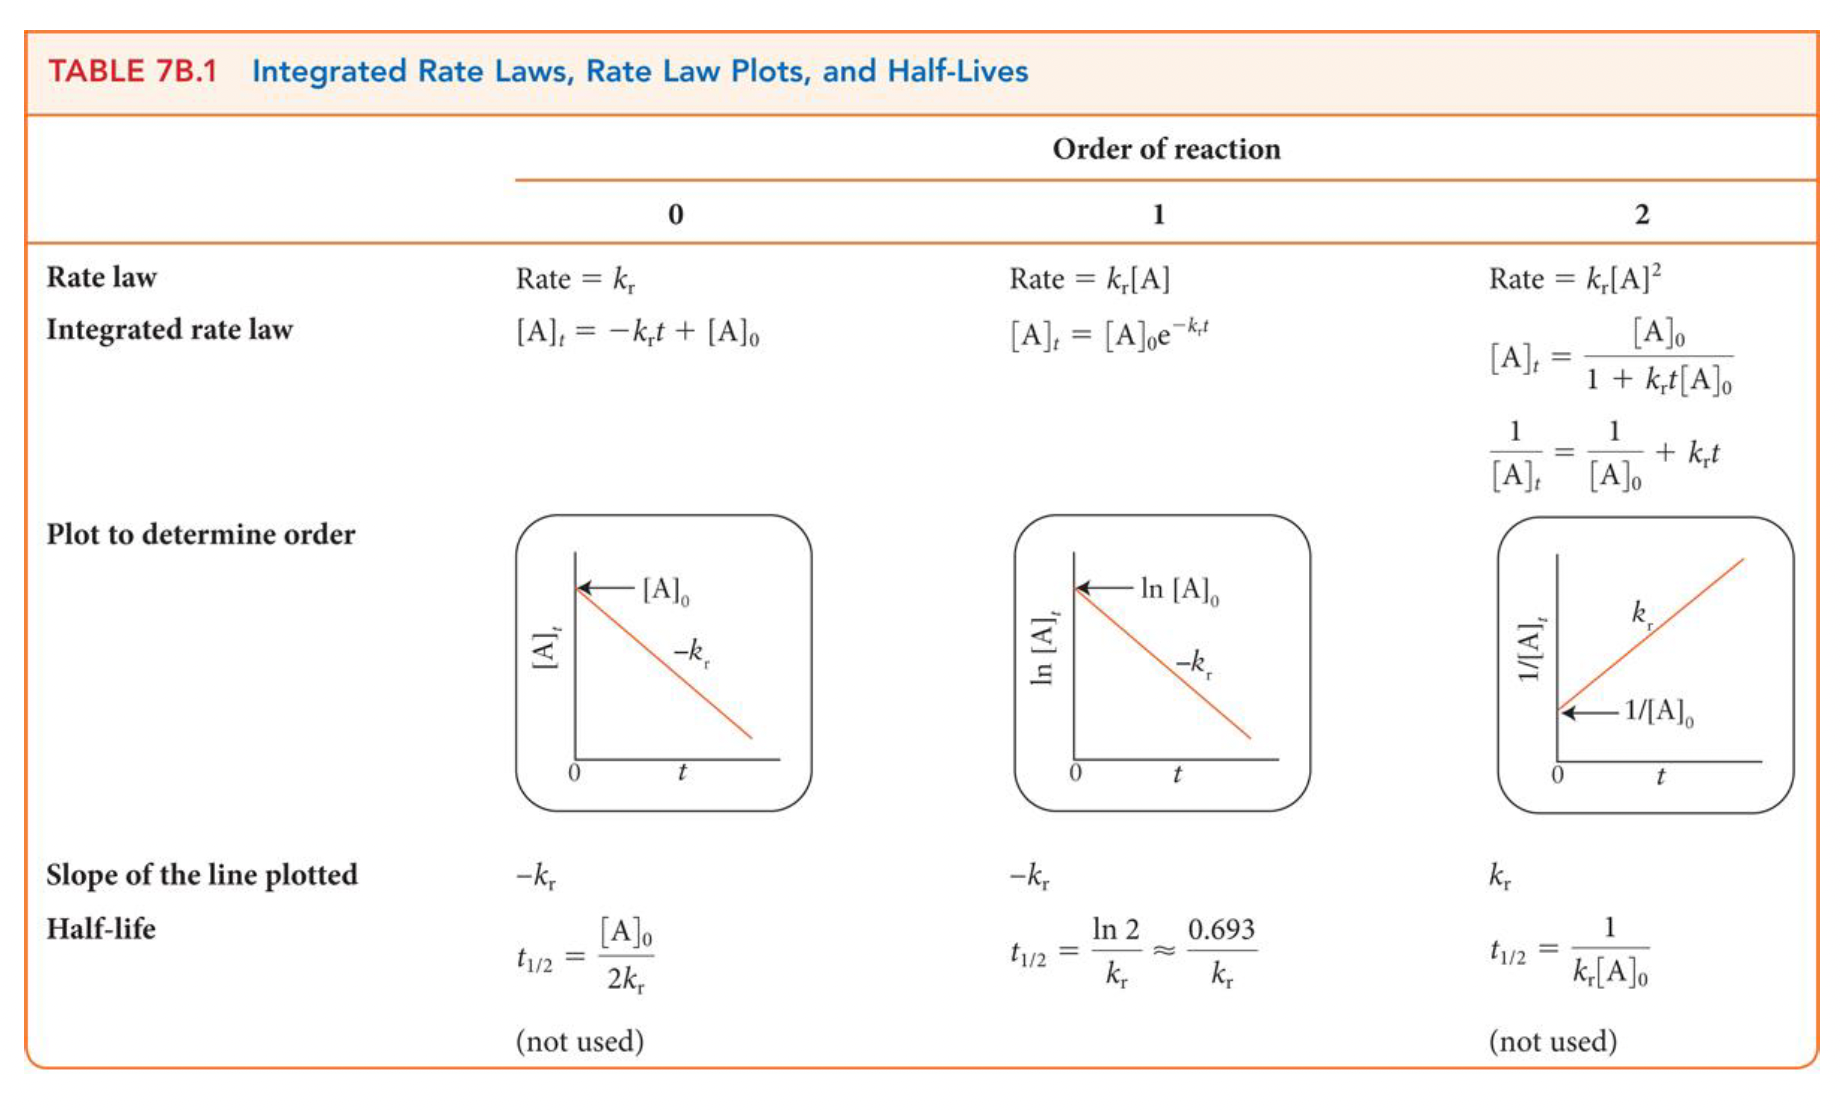

So in your lab, you'll collect absorbance data that changes as a a reaction progresses.  To get the rate of the reaction, you'll calculate a slope of absorbance vs. time.  

To do this microsoft excel or google sheets, you would plot absorbance vs. time, identify the linear region of this curve, and take the initial slope to get a rate.  
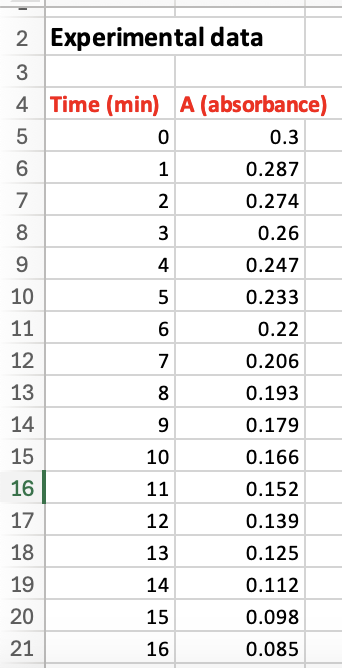

In python, instead of using cells, we put data in objects called arrays.  We use the package numpy (for numerical python) to hold the data in arrays.  You can think of each of these arrays as representing one column from the above spreadsheet screenshot.

We first import the numpy package and use the shorthand "np" as the name of package with the line:

import numpy as np

Then we're going to make two arrays with the desired values:

time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193, 0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

Then we use the print function to check that we have the correct values in the arrays.

**To run a cell of code you need hold the "shift" key and hit enter**



In [30]:
import numpy as np
time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

absorbance = np.array([0.30149, 0.28775, 0.27632, 0.26276, 0.24871, 0.23646, 0.22197, 0.20703, 0.19534,
    0.17919, 0.16767, 0.15352, 0.13953, 0.12488, 0.11315, 0.09916, 0.08337])


print("time values:")
print(time)
print("absorbance values:")
print(absorbance)

time values:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
absorbance values:
[0.30149 0.28775 0.27632 0.26276 0.24871 0.23646 0.22197 0.20703 0.19534
 0.17919 0.16767 0.15352 0.13953 0.12488 0.11315 0.09916 0.08337]


If you were using excel, you could insert a chart of these values and then fit a line to measure the slope

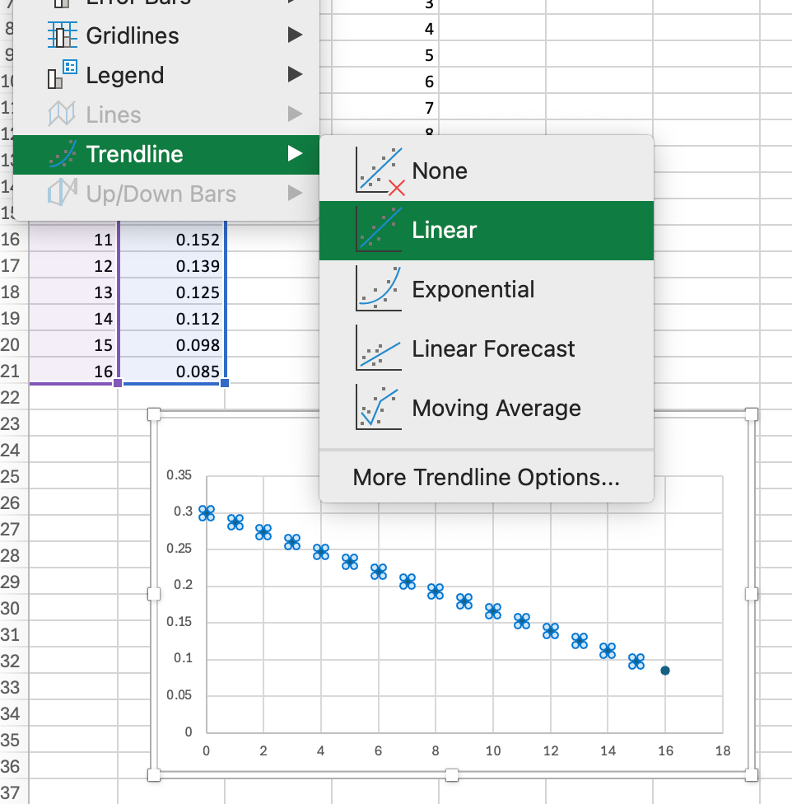

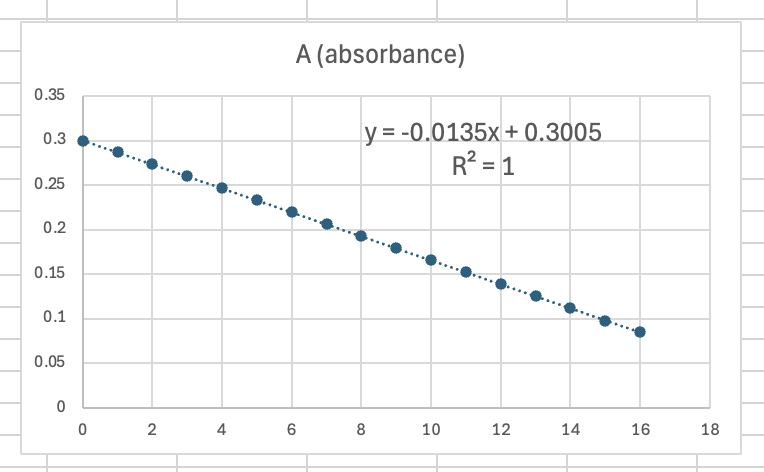

Here is code to do make same plot in python.

We first import the python library matplotlib.pylpot with the following command:

import matplotlib.pyplot as plt


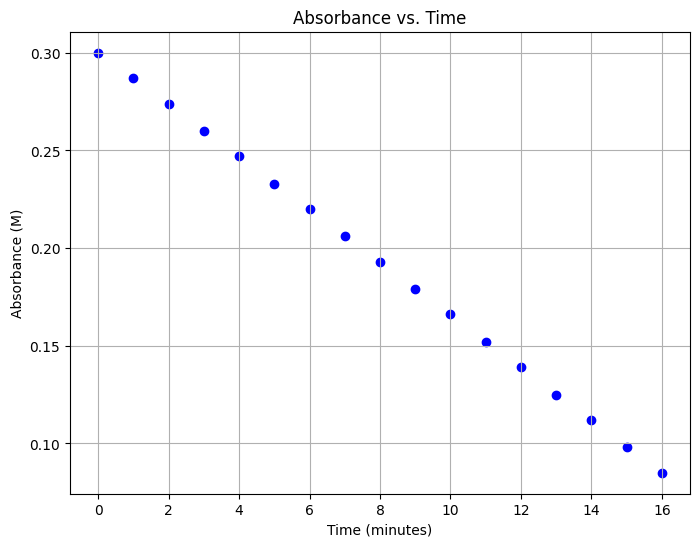

In [31]:
import matplotlib.pyplot as plt


time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(time, absorbance, marker='o', linestyle='-', color='blue')
plt.xlabel("Time (minutes)")
plt.ylabel("Absorbance (M)")
plt.title("Absorbance vs. Time")
plt.grid(True)
plt.show()


Slope: -0.013480392156862746
Intercept: 0.30054901960784314
R-squared: 0.9999814879460085
Residuals: [-5.49019608e-04 -6.86274510e-05  4.11764706e-04 -1.07843137e-04
  3.72549020e-04 -1.47058824e-04  3.33333333e-04 -1.86274510e-04
  2.94117647e-04 -2.25490196e-04  2.54901961e-04 -2.64705882e-04
  2.15686275e-04 -3.03921569e-04  1.76470588e-04 -3.43137255e-04
  1.37254902e-04]


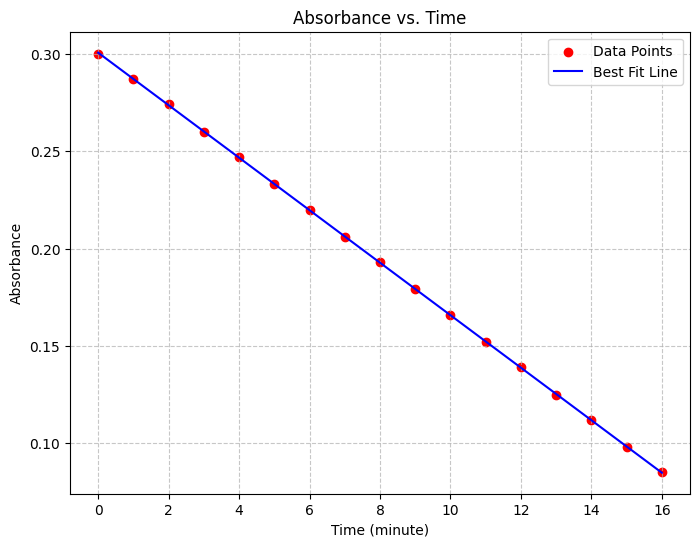

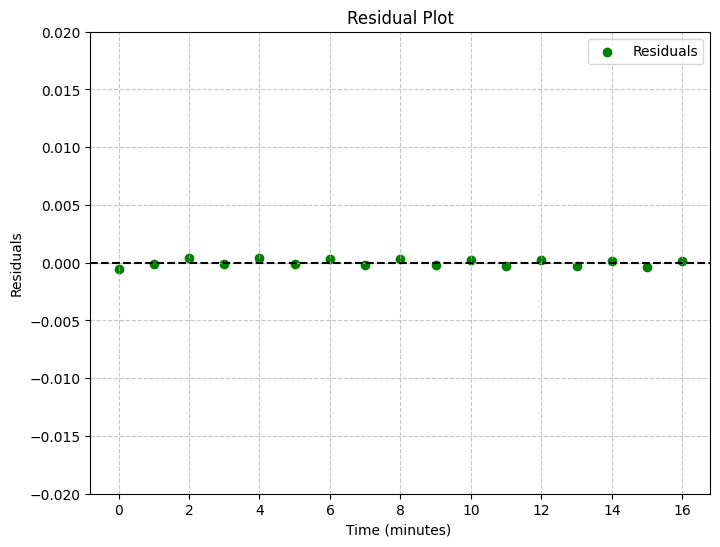

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

# Calculate the linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = linregress(time, absorbance)

# Create the best fit line
best_fit_line = slope * time + intercept

# Calculate residuals
residuals = absorbance - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))
plt.scatter(time, absorbance, marker='o', color='red', label="Data Points")
plt.plot(time, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Time (minute)")
plt.ylabel("Absorbance")
plt.title("Absorbance vs. Time")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(time, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Time (minutes) ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(-0.02, 0.02)  # Set x-axis limits
plt.show()

You're also going to want to compare some plots of the natural log of abosrance (A): ln(A).  To do this excel you use the function LN(Value) to make a new column containing the valued of (ln(A))

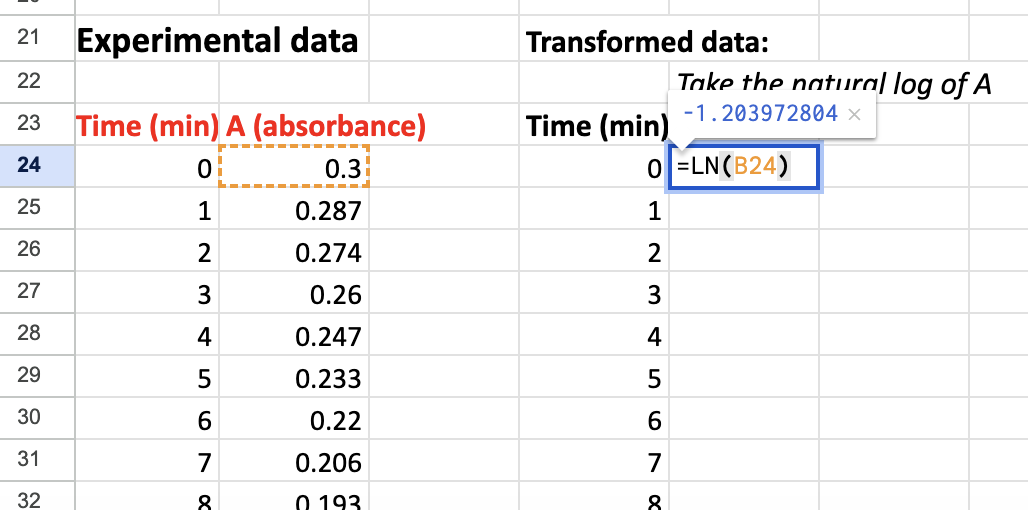

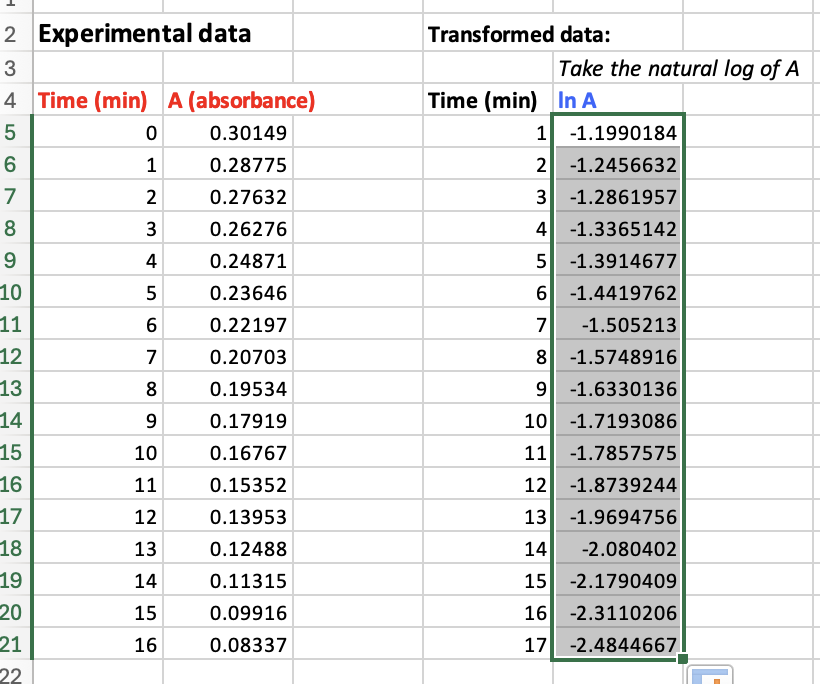

To do this in python - we can perform a mathematical operation on every value in an array.  

We're going to use the numpy function log:

https://numpy.org/doc/stable/reference/generated/numpy.log.html

Note that the command np.log(ARRAY) will return the natural log (ln) of every value in an array, and there is seperate function to (np.log10(ARRAY)) to use the base 10 log,

Here is how to take the natural log of all of the follows in our absorbance array:

---



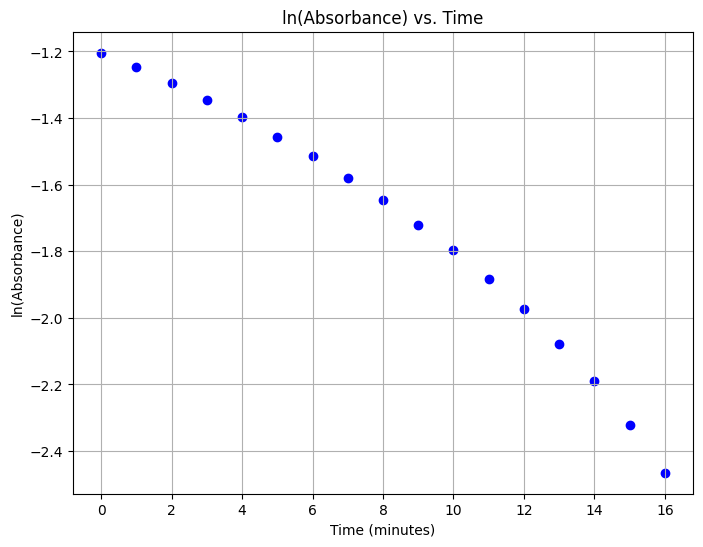

In [25]:
import matplotlib.pyplot as plt


time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

log_absorbance=np.log(absorbance)


# Plot the data
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(time, log_absorbance, marker='o', linestyle='-', color='blue')

plt.xlabel("Time (minutes)")
plt.ylabel("ln(Absorbance)")
plt.title("ln(Absorbance) vs. Time")
plt.grid(True)
plt.show()

And here is how we can do the same thing with the reciprocal of absorbance:

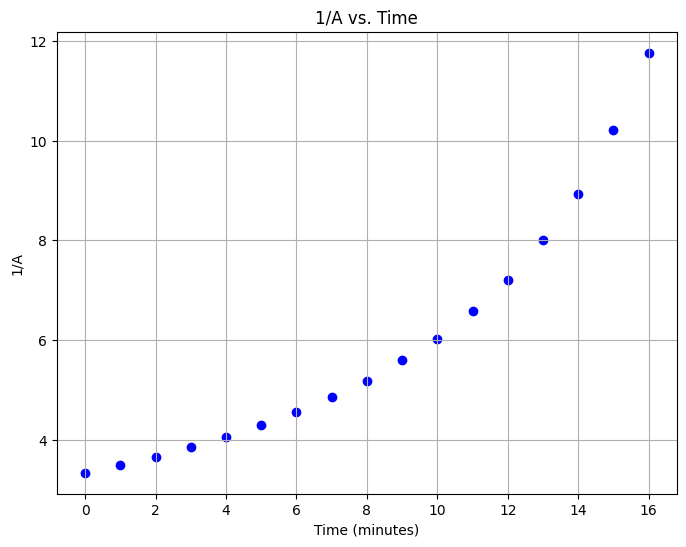

In [27]:
import matplotlib.pyplot as plt


time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

recip_concentration=1/absorbance

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(time, recip_concentration, marker='o', linestyle='-', color='blue')

plt.xlabel("Time (minutes)")
plt.ylabel("1/A")
plt.title("1/A vs. Time")
plt.grid(True)
plt.show()

Can you figure out how to attempt a linear fit of ln(A) and 1/A vs. time?  Give this a try below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data points (x, y) from the graph (approximate)
time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

#####ADD CODE HERE TO CALCULATE ln(abosrbance)

# Calculate the linear regression (best fit line)

####ADJUST THE LINE BELOW TO compute for ln(absorbance) #########
slope, intercept, r_value, p_value, std_err = linregress(time, absorbance)

# Create the best fit line
best_fit_line = slope * time + intercept

# Calculate residuals
####ADJUST THE LINE BELOW TO compute residuals for ln(absorbance) #########
residuals = absorbance - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))

####ADJUST THE LINE BELOW TO PLOT ln(absorbance) #########
plt.scatter(time, absorbance, marker='o', color='red', label="Data Points")
plt.plot(time, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Time (minute)")

####ADJUST THE LABELS APROPRIATELY##############
plt.ylabel("Absorbance")
plt.title("Absorbance vs. Time")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(time, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Time (minutes) ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(-0.02, 0.02)  # Set x-axis limits
plt.show()

Slope: -0.07579698302735854
Intercept: -1.106446796293123
R-squared: 0.971407421556017
Residuals: [-0.09752601 -0.06602928 -0.03658641 -0.0132359   0.01126779  0.02871489
  0.04710096  0.05714657  0.06775757  0.06825017  0.06864914  0.05633885
  0.04272925  0.01236603 -0.02165185 -0.07938626 -0.1459055 ]


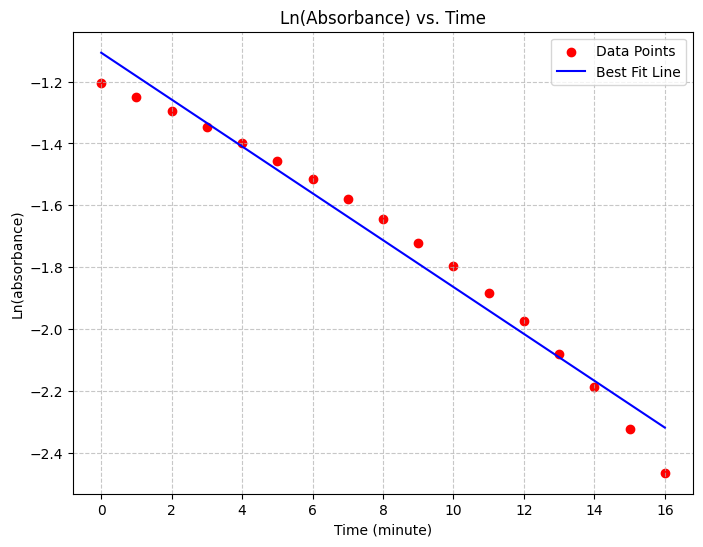

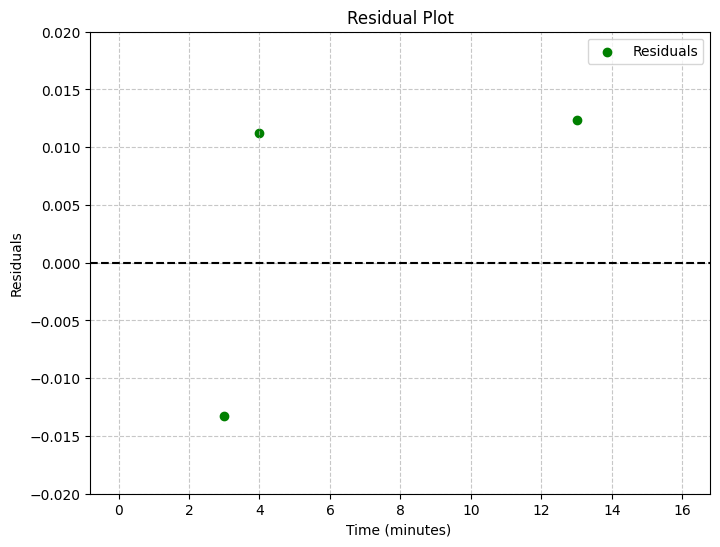

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data points (x, y) from the graph (approximate)
time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

#####ADD CODE HERE TO CALCULATE ln(abosrbance)
log_absorbance=np.log(absorbance)

# Calculate the linear regression (best fit line)

####ADJUST THE LINE BELOW TO compute for ln(absorbance) #########
slope, intercept, r_value, p_value, std_err = linregress(time, log_absorbance)

# Create the best fit line
best_fit_line = slope * time + intercept

# Calculate residuals
####ADJUST THE LINE BELOW TO compute residuals for ln(absorbance) #########
residuals = log_absorbance - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))

####ADJUST THE LINE BELOW TO PLOT ln(absorbance) #########
plt.scatter(time, log_absorbance, marker='o', color='red', label="Data Points")
plt.plot(time, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Time (minute)")

####ADJUST THE LABELS APROPRIATELY##############
plt.ylabel("Ln(absorbance)")
plt.title("Ln(Absorbance) vs. Time")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(time, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Time (minutes) ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(-0.02, 0.02)  # Set x-axis limits
plt.show()

Now - lets use a linear plotting fucntion that includes an error estimate - and lets try fitting some noiser data

Slope: -0.0162 ± 0.0015
Intercept: 0.3242 ± 0.0007
R-squared: 0.8856


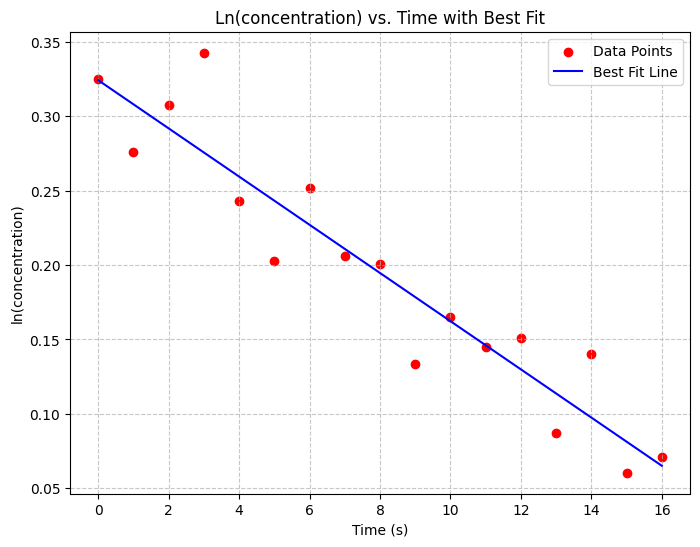

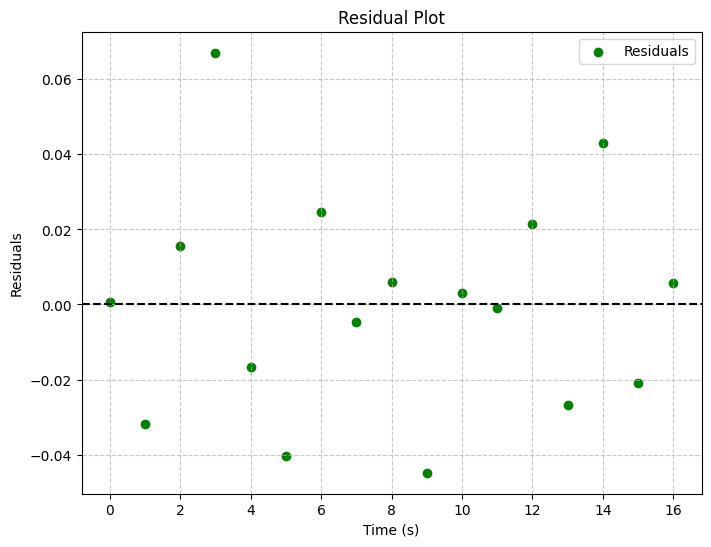

In [41]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt


x_values = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
#y_values = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
#                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

y_noisy = np.array([0.32483571, 0.27608678, 0.30738443, 0.34271349, 0.24284352,0.20298896, 0.25173238, 0.20620223, 0.20071358, 0.13362194,
 0.16518661, 0.14505845, 0.1512154 , 0.08675425, 0.14034988,0.06037712, 0.07083195])

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_noisy)

# Calculate best fit line
best_fit_line = slope * x_values + intercept

# Calculate residuals
residuals = y_noisy - best_fit_line

# Estimate standard error of intercept
n = len(x_values)
mean_x = np.mean(x_values)
ssx = np.sum((x_values - mean_x)**2)
intercept_stderr = std_err * np.sqrt(np.sum(x_values**2) / (n * ssx))

# Print regression results with error estimates
print(f"Slope: {slope:.4f} ± {std_err:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_stderr:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Plot the data and best fit line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_noisy, marker='o', color='red', label="Data Points")
plt.plot(x_values, best_fit_line, color='blue', label="Best Fit Line")
plt.xlabel("Time (s)")
plt.ylabel("ln(concentration)")
plt.title("Ln(concentration) vs. Time with Best Fit")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(x_values, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

And here is an example of how to plot multiple series on the same plot

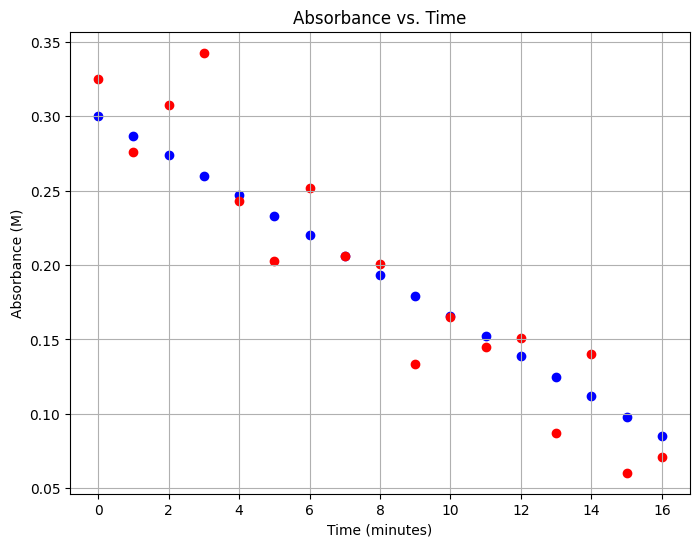

In [42]:
import matplotlib.pyplot as plt


time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])
y_noisy = np.array([0.32483571, 0.27608678, 0.30738443, 0.34271349, 0.24284352,0.20298896, 0.25173238, 0.20620223, 0.20071358, 0.13362194,
 0.16518661, 0.14505845, 0.1512154 , 0.08675425, 0.14034988,0.06037712, 0.07083195])

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(time, absorbance, marker='o', linestyle='-', color='blue')
plt.scatter(time, y_noisy, marker='o', linestyle='-', color='red')

plt.xlabel("Time (minutes)")
plt.ylabel("Absorbance (M)")
plt.title("Absorbance vs. Time")
plt.grid(True)
plt.show()